In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data=pd.read_csv("Groceries_dataset.csv")
#data.style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0, subset=None)

In [3]:
data.shape

(38765, 3)

**The dataset has 38765 rows of the purchase orders of people from the grocery stores. These orders can be analysed and association rules can be generated using Market Basket Analysis by algorithms like Apriori Algorithm.**

In [4]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

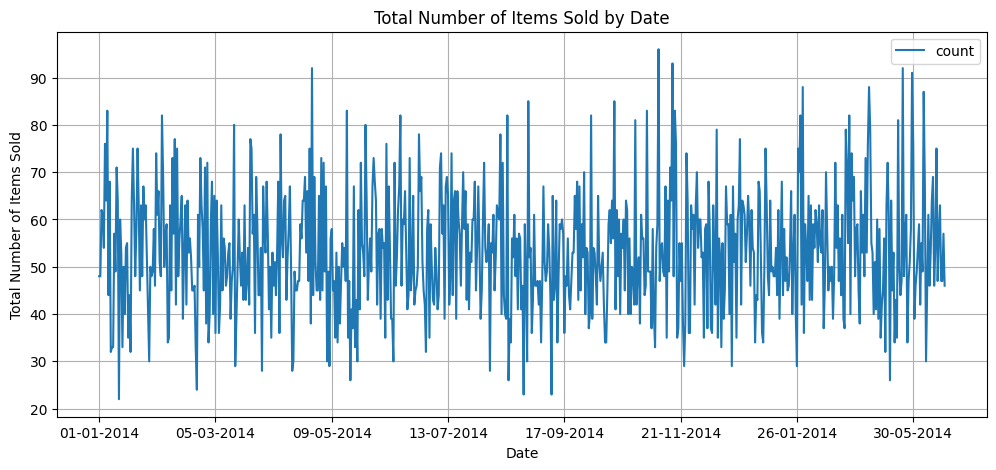

In [5]:
data.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [6]:
d=data.set_index(['Date'])

In [7]:
d

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk
...,...,...
08-10-2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


In [8]:
d.index=pd.to_datetime(d.index)

C:\Users\Naufal_Rz19\AppData\Local\Temp\ipykernel_14036\3890560448.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d.index=pd.to_datetime(d.index)


In [9]:
total_items = len(d)
total_days = len(np.unique(d.index.date))
total_months = len(np.unique(d.index.month))
average_items = total_items / total_days
unique_items = d.itemDescription.unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38765 items sold in 728 days throughout 12 months
With an average of 53.24862637362637 items sold daily


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

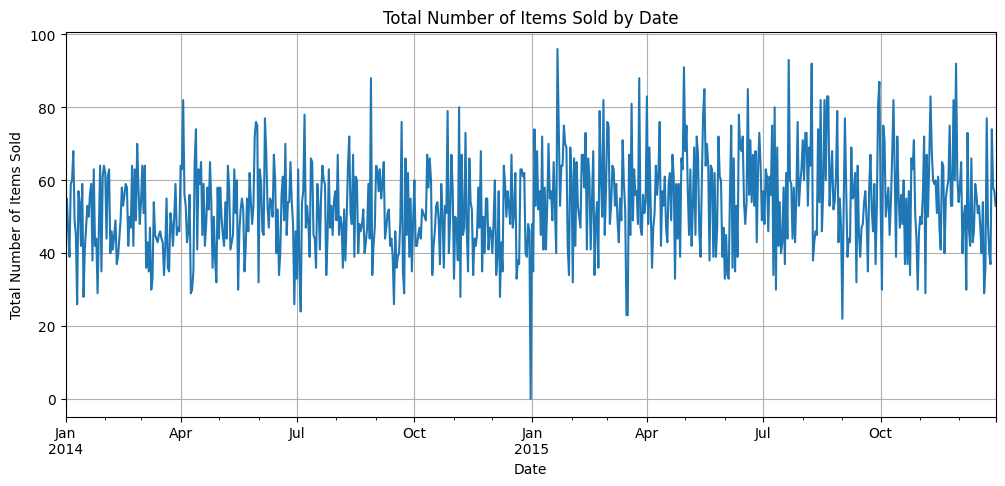

In [10]:
d.resample("D")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

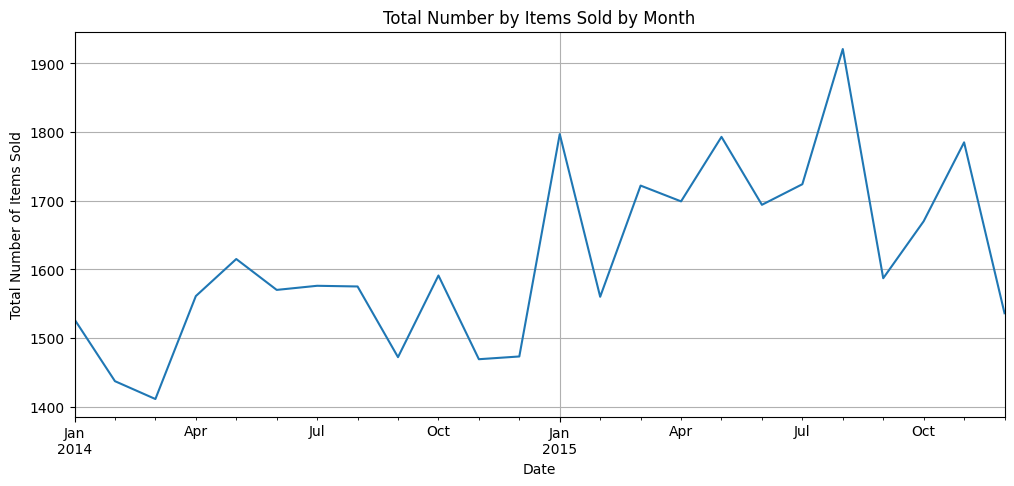

In [11]:
d.resample("M")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [12]:
d["Hour"] = d.index.hour
d["Weekday"] = d.index.weekday + 1

d.head(10)

,Member_number,itemDescription,Hour,Weekday
Date,,,,
2015-07-21,1808,tropical fruit,0,2
2015-01-05,2552,whole milk,0,1
2015-09-19,2300,pip fruit,0,6
2015-12-12,1187,other vegetables,0,6
2015-02-01,3037,whole milk,0,7
2015-02-14,4941,rolls/buns,0,6
2015-05-08,4501,other vegetables,0,5
2015-12-23,3803,pot plants,0,3
2015-03-20,2762,whole milk,0,5


In [13]:
data['itemDescription'].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

In [14]:
data['Date'].nunique()

728

In [15]:
import plotly.express as px

In [16]:
def bar_plot(df,col):

    fig = px.bar(df,
        x = df[col].value_counts().keys(), 
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
    xaxis_title= col,
    yaxis_title="Count",
    legend_title=col,
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
    
    fig.show()

In [17]:
bar_plot(data,'itemDescription')

In [18]:
df=data.groupby(['Member_number','Date'])['itemDescription'].apply(sum)

In [19]:
df

Member_number  Date      
1000           15-03-2015           sausagewhole milksemi-finished breadyogurt
               24-06-2014                          whole milkpastrysalty snack
               24-07-2015                           canned beermisc. beverages
               25-11-2015                              sausagehygiene articles
               27-05-2015                               sodapickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruitberriesother vegetablesyogurtkit...
               26-12-2015                                   bottled waterherbs
5000           09-03-2014                          fruit/vegetable juiceonions
               10-02-2015               sodaroot vegetablessemi-finished bread
               16-11-2014                         bottled beerother vegetables
Name: itemDescription, Length: 14963, dtype: object

In [20]:
df.values

array(['sausagewhole milksemi-finished breadyogurt',
       'whole milkpastrysalty snack', 'canned beermisc. beverages', ...,
       'fruit/vegetable juiceonions',
       'sodaroot vegetablessemi-finished bread',
       'bottled beerother vegetables'], dtype=object)

In [24]:
pd.set_option('display.max_colwidth', 1)

In [25]:
transactions = [a[1]['itemDescription'].tolist() for a in list(data.groupby(['Member_number','Date']))]

In [26]:
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [29]:
from mlxtend.preprocessing import TransactionEncoder

for details about TransactionEncoder-http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

In [30]:
te = TransactionEncoder()


In [31]:
te_ary = te.fit(transactions).transform(transactions)

In [32]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [33]:
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [34]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()

In [35]:
pf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [36]:
pf.iloc[0]-pf.iloc[3]

Instant food products    60  
UHT-milk                 320 
abrasive cleaner         22  
artif. sweetener         29  
baby cosmetics           3   
                        ..   
white bread              359 
white wine               175 
whole milk               2363
yogurt                   1285
zwieback                 60  
Length: 167, dtype: object

In [37]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)

In [38]:
c_transactions = transactions.copy()
c_transactions.replace(False, '', inplace=True)
c_transactions.replace(True, 1, inplace=True)

c_transactions.rename(columns=lambda x: x.title(), inplace=True)
transactions.rename(columns=lambda x: x.title(), inplace=True)


In [39]:
c_transactions.head()
# transactions.head()

,Instant Food Products,Uht-Milk,Abrasive Cleaner,Artif. Sweetener,Baby Cosmetics,Bags,Baking Powder,Bathroom Cleaner,Beef,Berries,...,Turkey,Vinegar,Waffles,Whipped/Sour Cream,Whisky,White Bread,White Wine,Whole Milk,Yogurt,Zwieback
0,,,,,,,,,,,...,,,,,,,,1,1,
1,,,,,,,,,,,...,,,,,,,,1,,
2,,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,


In [40]:
transactions.to_csv('groceries_heeral.csv', index=False)
c_transactions.to_csv('groceries_heeral_2.csv', index=False)

In [41]:
item

,Count,Item
164,2363,whole milk
102,1827,other vegetables
122,1646,rolls/buns
138,1453,soda
165,1285,yogurt
123,1041,root vegetables
156,1014,tropical fruit
12,908,bottled water
130,903,sausage
30,795,citrus fruit


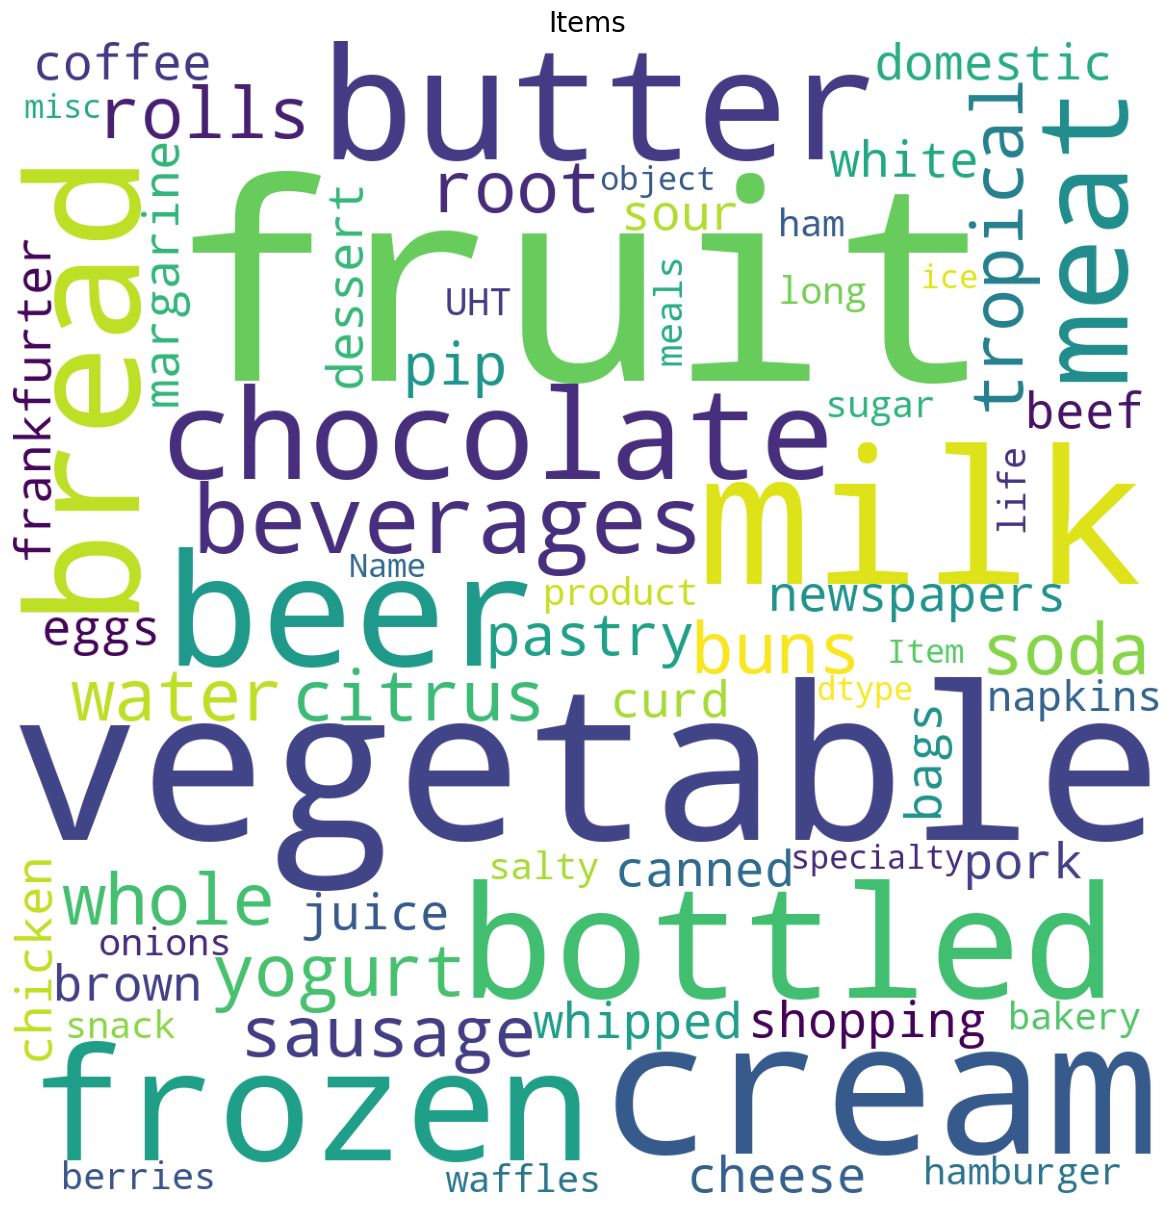

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [44]:
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

**Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.**

In [45]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

Support:
The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :

**Support(I)=Number of transactions containing I/Total number of Transactions
**

Confidence:
This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2,  in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.

**Confidence(I1->I2)=Number of Transactions containing I1 and I2/(Total Number of Transactions containing I1)**

Lift:
Lift is the ratio between the confidence and support expressed as :

**Lift(I1->I2)=Confidence(I1->I2)/Support(I2)**


In [46]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
freq_items

Processing 28 combinations | Sampling itemset size 4e 3


,support,itemsets
0,0.004010,(Instant Food Products)
1,0.021386,(Uht-Milk)
2,0.001470,(Abrasive Cleaner)
3,0.001938,(Artif. Sweetener)
4,0.008087,(Baking Powder)
...,...,...
745,0.001136,"(Sausage, Whole Milk, Rolls/Buns)"
746,0.001002,"(Soda, Whole Milk, Rolls/Buns)"
747,0.001337,"(Whole Milk, Yogurt, Rolls/Buns)"
748,0.001069,"(Soda, Sausage, Whole Milk)"


In [47]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [48]:
freq_items.head(10)

,support,itemsets,length
0,0.004010,(Instant Food Products),1
1,0.021386,(Uht-Milk),1
2,0.001470,(Abrasive Cleaner),1
3,0.001938,(Artif. Sweetener),1
4,0.008087,(Baking Powder),1
5,0.001136,(Bathroom Cleaner),1
6,0.033950,(Beef),1
7,0.021787,(Berries),1
8,0.016574,(Beverages),1
9,0.045312,(Bottled Beer),1


In [49]:
freq_items.tail(10)

,support,itemsets,length
740,0.011161,"(Whole Milk, Yogurt)",2
741,0.001136,"(Soda, Other Vegetables, Rolls/Buns)",3
742,0.001203,"(Other Vegetables, Whole Milk, Rolls/Buns)",3
743,0.001136,"(Soda, Whole Milk, Other Vegetables)",3
744,0.001136,"(Other Vegetables, Whole Milk, Yogurt)",3
745,0.001136,"(Sausage, Whole Milk, Rolls/Buns)",3
746,0.001002,"(Soda, Whole Milk, Rolls/Buns)",3
747,0.001337,"(Whole Milk, Yogurt, Rolls/Buns)",3
748,0.001069,"(Soda, Sausage, Whole Milk)",3
749,0.001470,"(Sausage, Whole Milk, Yogurt)",3


In [50]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Uht-Milk),(Bottled Water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(Bottled Water),(Uht-Milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(Uht-Milk),(Other Vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(Other Vegetables),(Uht-Milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(Uht-Milk),(Rolls/Buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009,-0.236873


In [51]:
fig=px.scatter(rules['support'], rules['confidence'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="confidence",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')
    
)

fig.show()

In [52]:
fig=px.scatter(rules['support'], rules['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')
    
)

fig.show()

Text(0.5, 1.0, 'lift vs Confidence')

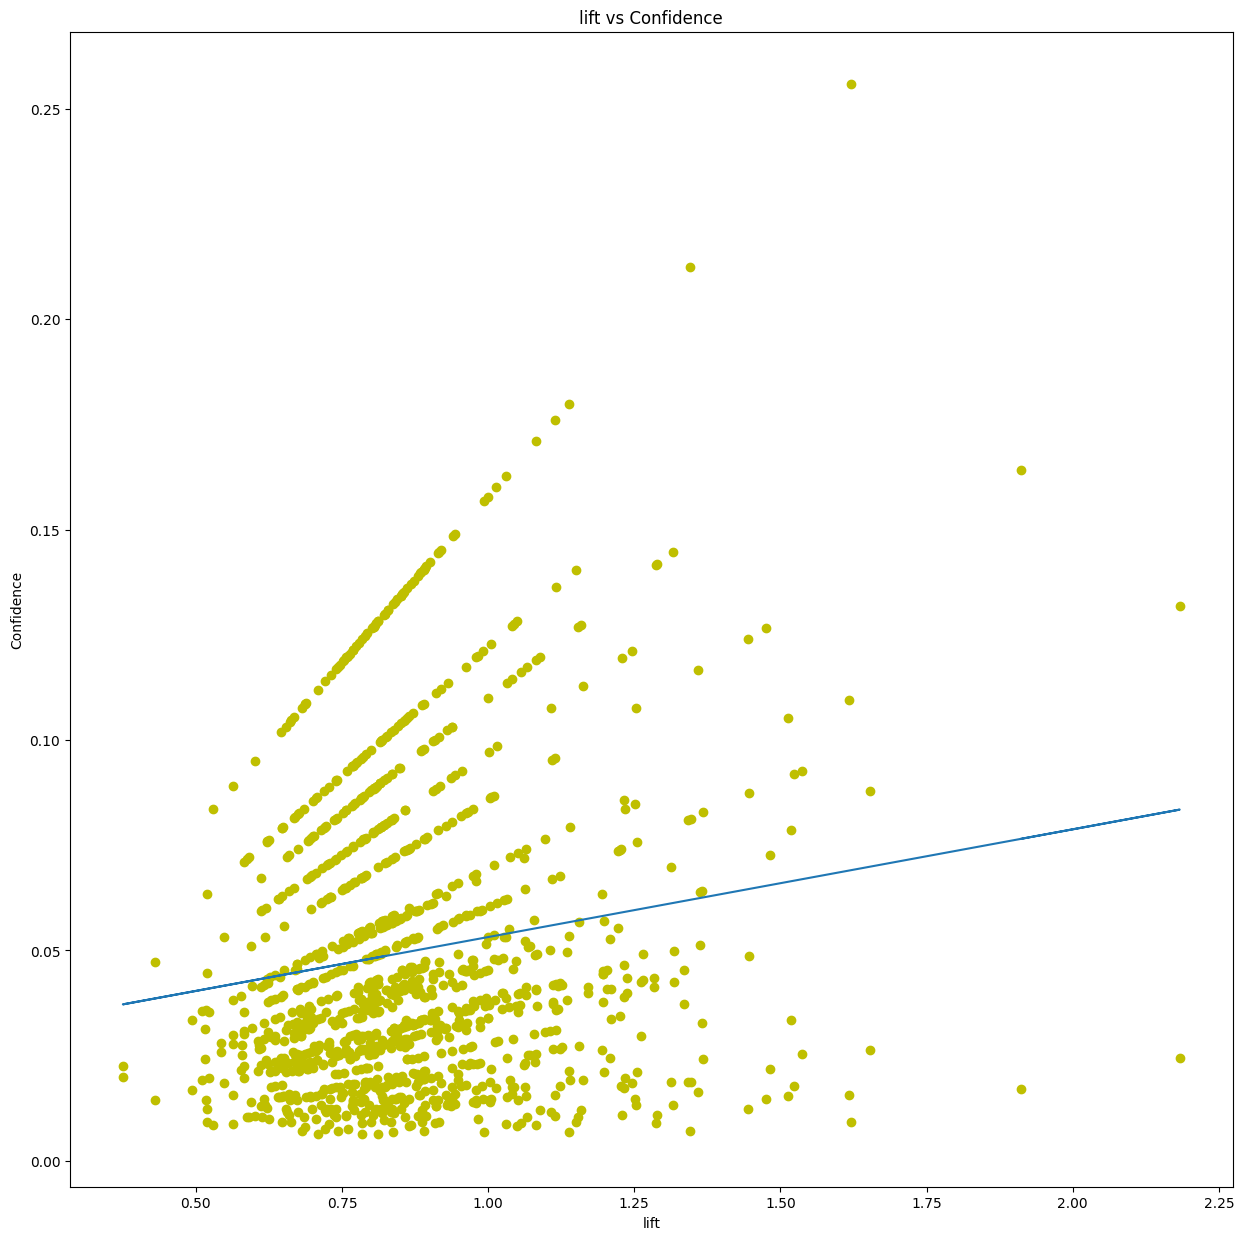

In [53]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')